# Analysis of HIBP/YouGov Data

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from yellowbrick.features import Rank2D
sns.set(style="darkgrid")
os.getcwd()
os.listdir('.')
print(os.getcwd())
print(os.chdir('D:\lenovo\My_Project'))

  

D:\lenovo\My_Project
None


In [25]:
%pwd

'D:\\lenovo\\My_Project'

In [21]:
# %% Read the data
originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
pwnedD = pd.read_csv('data/breached_data.csv', low_memory=False)
print("Number of people:", originalD.shape[0])
print("Number of people whose info. was breached:", pwnedD['id'].nunique())
print("Number of breaches:", pwnedD.shape[0])



Number of people: 5000
Number of people whose info. was breached: 4142
Number of breaches: 14979


## 4,142 credentials have been part of at least 14,979 breaches.


#### Merge the two files

#### NO. of columns in the final dataset

In [22]:
# %% Merge the two files
fin_dat = pd.merge(originalD, pwnedD, on='id', how='left')
print("Number of rows in the final dataset: ", fin_dat.shape[0])
fin_dat.head(5)



Number of rows in the final dataset:  15837


,id,gender,birthyr,race,educ,faminc,inputstate,pid3,pid7,votereg,...,ModifiedDate,PwnCount,DataClasses,IsVerified,IsFabricated,IsSensitive,IsActive,IsRetired,IsSpamList,LogoType
0,371823339,1,1993,1,2,4,39,3,5,1,...,2017-03-08T23:49:53Z,393430309.0,"Email addresses, IP addresses, Names, Physical...",True,False,False,True,False,True,png
1,371823339,1,1993,1,2,4,39,3,5,1,...,2017-08-07T02:51:12Z,85176234.0,"Email addresses, Passwords, Usernames",True,False,False,True,False,False,svg
2,398212310,1,2000,1,2,97,51,5,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,392933925,1,2000,1,1,1,34,2,7,1,...,2017-08-07T02:51:12Z,85176234.0,"Email addresses, Passwords, Usernames",True,False,False,True,False,False,svg
4,392933925,1,2000,1,1,1,34,2,7,1,...,2017-03-25T23:43:45Z,29396116.0,"Email addresses, IP addresses, Passwords, User...",True,False,False,True,False,False,png


In [23]:
fin_dat.describe(())

,id,gender,birthyr,race,educ,faminc,inputstate,pid3,pid7,votereg,ideo5,newsint,marstat,child18,employ,presvote16post,region,PwnCount
count,1.583700e+04,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,15837.000000,1.497900e+04
mean,2.216621e+08,1.536276,1969.682452,1.725264,3.411000,18.443203,27.903138,2.176485,3.758098,1.121677,3.248153,1.834501,2.983835,1.760245,3.429248,2.761634,2.631180,1.963389e+08
std,9.893447e+07,0.498698,17.726890,1.314895,1.513512,31.540958,15.765047,1.132309,2.367428,0.370391,1.449294,1.107371,1.896739,0.426947,2.522543,2.298692,1.025032,2.161554e+08
min,1.417970e+07,1.000000,1921.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.643100e+04
50%,1.521860e+08,2.000000,1970.000000,1.000000,3.000000,6.000000,28.000000,2.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,6.864801e+07
max,4.500885e+08,2.000000,2000.000000,8.000000,6.000000,97.000000,56.000000,5.000000,99.000000,3.000000,6.000000,5.000000,6.000000,2.000000,9.000000,7.000000,4.000000,7.114776e+08


In [7]:
fin_dat.describe(include=['O'])

,Title,Name,Domain,BreachDate,AddedDate,ModifiedDate,DataClasses,IsVerified,IsFabricated,IsSensitive,IsActive,IsRetired,IsSpamList,LogoType
count,14979,14979,13257,14979,14979,14979,14979,14979,14979,14979,14979,14979,14979,14979
unique,162,162,156,132,158,158,69,1,1,1,1,1,2,3
top,River City Media Spam List,RiverCityMedia,rivercitymediaonline.com,1/1/2017,2017-03-08T23:49:53Z,2017-03-08T23:49:53Z,"Email addresses, Passwords",True,False,False,True,False,False,png
freq,2913,2913,2913,2949,2913,2913,3586,14979,14979,14979,14979,14979,9330,8867


In [8]:
list(fin_dat)


['id',
 'gender',
 'birthyr',
 'race',
 'educ',
 'faminc',
 'inputstate',
 'pid3',
 'pid7',
 'votereg',
 'ideo5',
 'newsint',
 'marstat',
 'child18',
 'employ',
 'presvote16post',
 'region',
 'Title',
 'Name',
 'Domain',
 'BreachDate',
 'AddedDate',
 'ModifiedDate',
 'PwnCount',
 'DataClasses',
 'IsVerified',
 'IsFabricated',
 'IsSensitive',
 'IsActive',
 'IsRetired',
 'IsSpamList',
 'LogoType']

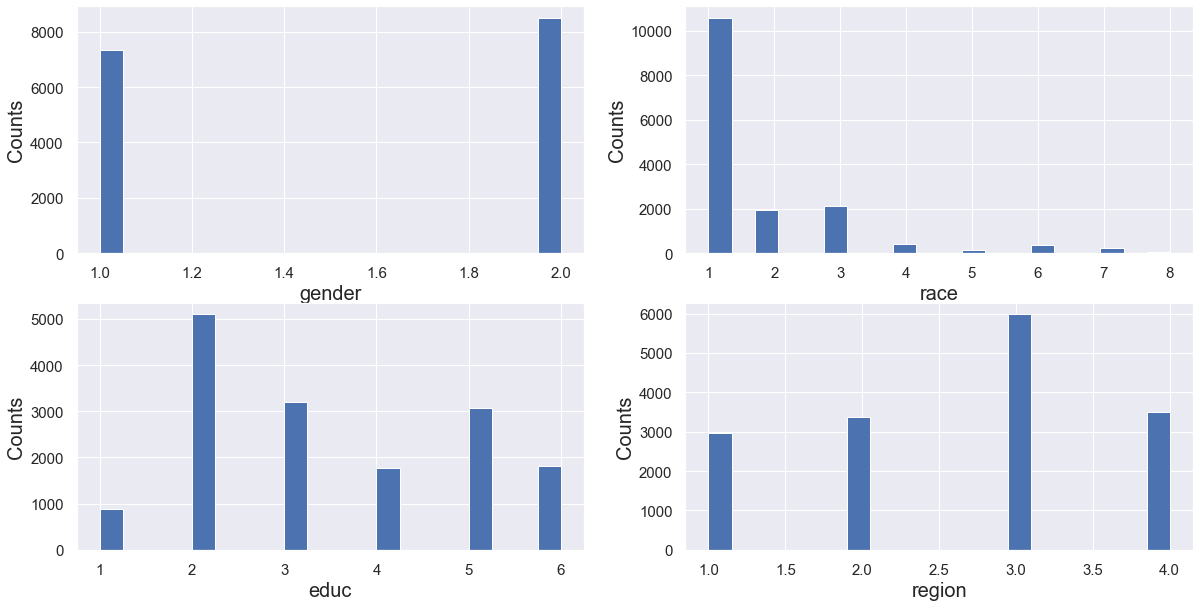

In [24]:
# set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['gender', 'race','educ','region']
xaxes = num_features
yaxes = ['Counts', 'Counts','Counts','Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(fin_dat[num_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

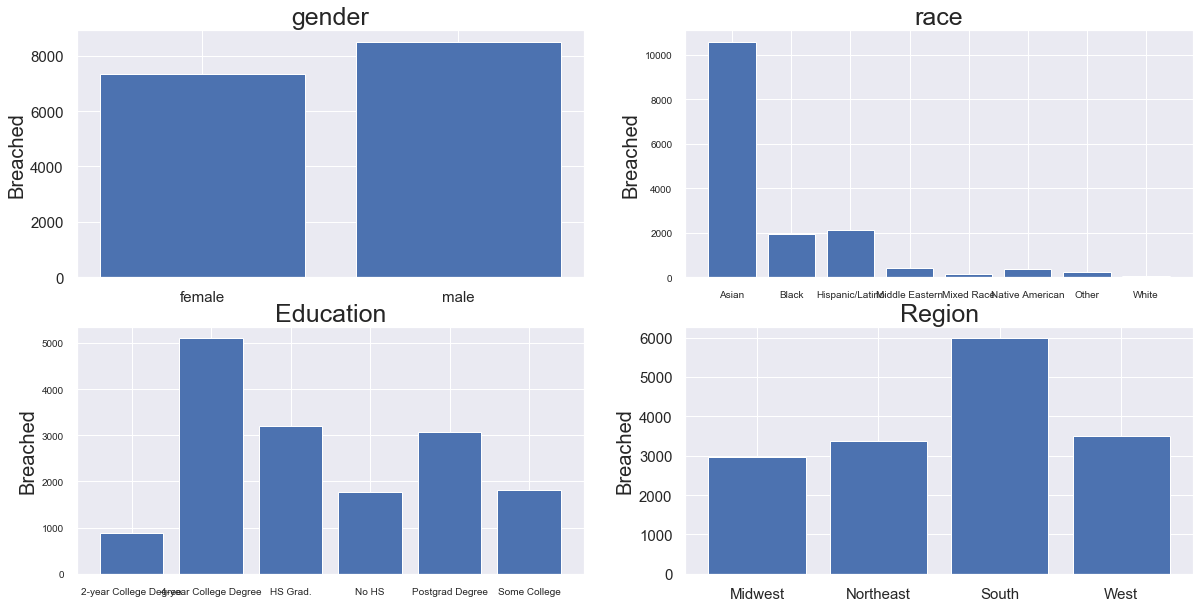

In [27]:
# set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_gender = fin_dat.replace({'gender': {1: 'male', 2: 'female'}}).groupby('gender').size().reset_index(name='Breached')['gender']
Y_Breached = fin_dat.replace({'Breached': {1: 'male', 2: 'female'}}).groupby('gender').size().reset_index(name='Breached')['Breached']
# make the bar plot
axes[0, 0].bar(X_gender, Y_Breached)
axes[0, 0].set_title('gender', fontsize=25)
axes[0, 0].set_ylabel('Breached', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


# make the data read to feed into the visulizer
X_race = fin_dat.replace({'race': {1: 'White', 2: 'Black',
                                               3: 'Hispanic/Latino',
                                               4: 'Asian',
                                               5: 'Native American',
                                               6: 'Middle Eastern',
                                               7: 'Mixed Race',
                                               8: 'Other'}}).groupby('race').size().reset_index(name='Breached')['race']
Y_Breached = fin_dat.replace({'Breached' : {1: 'White',
                                               2: 'Black',
                                               3: 'Hispanic/Latino',
                                               4: 'Asian',
                                               5: 'Native American',
                                               6: 'Middle Eastern',
                                               7: 'Mixed Race',
                                               8: 'Other'}}).groupby('race').size().reset_index(name='Breached')['Breached']
# make the bar plot
axes[0, 1].bar(X_race, Y_Breached)
axes[0, 1].set_title('race', fontsize=25)
axes[0, 1].set_ylabel('Breached', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=10)

# make the data read to feed into the visulizer
X_educ = fin_dat.replace({'educ' : {1: 'No HS',
                                             2: 'HS Grad.',
                                             3: 'Some College',
                                             4: '2-year College Degree',
                                             5: '4-year College Degree',
                                             6: 'Postgrad Degree'}}).groupby('educ').size().reset_index(name='Breached')['educ']
Y_Breached = fin_dat.replace({'Breached' : {1: 'No HS',
                                             2: 'HS Grad.',
                                             3: 'Some College',
                                             4: '2-year College Degree',
                                             5: '4-year College Degree',
                                             6: 'Postgrad Degree'}}).groupby('educ').size().reset_index(name='Breached')['Breached']
# make the bar plot
axes[1, 0].bar(X_educ, Y_Breached)
axes[1, 0].set_title('Education', fontsize=25)
axes[1, 0].set_ylabel('Breached', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=10)

# make the data read to feed into the visulizer
X_region = fin_dat.replace({'region' :{ 1: 'Northeast',
                                             2: 'Midwest',
                                             3: 'South',
                                             4: 'West'}}).groupby('region').size().reset_index(name='Breached')['region']
Y_Breached = fin_dat.replace({'Breached' : {1: 'Northeast',
                                             2: 'Midwest',
                                             3: 'South',
                                             4: 'West'}}).groupby('region').size().reset_index(name='Breached')['Breached']
# make the bar plot
axes[1, 1].bar(X_region, Y_Breached)
axes[1, 1].set_title('Region', fontsize=25)
axes[1, 1].set_ylabel('Breached', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)


#### Let's begin by testing how often emails from panelists are part of a breach.

In [53]:
# %% some people's emails are not part of the breach but join produces NaNs for them. We swap them with 0s
fin_dat['pwn'] = pd.notna(fin_dat['PwnCount'])
fin_dat.groupby(['id'])['pwn'].sum().describe().round(2)

count    5000.00
mean        3.00
std         2.62
min         0.00
25%         1.00
50%         3.00
75%         4.00
max        22.00
Name: pwn, dtype: float64

#### On average, people emails are part of 3 breaches (the median is about the same). The range of the number of breaches the people email is part of ranges from 0 to 22! And the standard deviation is 2.62.


#### So how does this exposure vary by gender, race, education, and age? We answer those questions next, starting with gender.


In [54]:
# %% Recode gender
fin_dat['sex'] = fin_dat['gender'].replace({1: 'male', 2: 'female'})
print((fin_dat['sex'].value_counts() / fin_dat['sex'].value_counts().sum()).round(2))
print(fin_dat.groupby(['id', 'sex'])['pwn'].sum().groupby(['sex']).mean().round(2))


female    0.54
male      0.46
Name: sex, dtype: float64
sex
female    3.17
male      2.82
Name: pwn, dtype: float64


#### Female's email are much more likely a part of the breaches than male's email (Diff = .35). But what does this signify? On average 100 male's email will be part of 282 breaches. The number is 317, for 100 females. Female's email are also around 12 per cent higher risk than male ones. It was a little surprising considering that the males are expected to have more online accounts.


### Gender graph

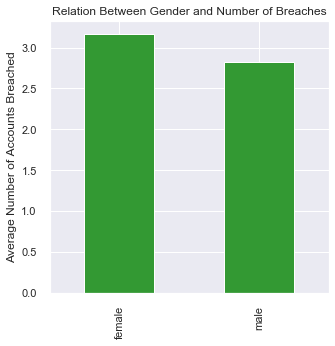

In [55]:
# %% Gender Graph
ax = (pd.DataFrame(fin_dat.groupby(['id', 'sex'])['pwn'].sum().groupby(['sex']).mean().round(2))).plot(kind='bar',
                                                                                                  grid= True,
                                                                                                  legend= False,
                                                                                                  figsize=[5, 5],
                                                                                                  color='#339933',
                                                                                                title='Relation Between Gender and Number of Breaches')
ax.set_ylabel('Average Number of Accounts Breached')
ax.set_xlabel('')
plt.savefig('gender.png', bbox_inches = 'tight')
plt.show()



#### Next look at race and ethnicity

In [56]:
# %% Recoding Race and Ethnicity
fin_dat['race_eth'] = fin_dat['race'].replace({1: 'White',
                                               2: 'Black',
                                               3: 'Hispanic/Latino',
                                               4: 'Asian',
                                               5: 'Native American',
                                               6: 'Middle Eastern',
                                               7: 'Mixed Race',
                                               8: 'Other'})

# Let's first check how many of each we got
X = (fin_dat['race_eth'].value_counts() / fin_dat['race_eth'].value_counts().sum()).round(2)
# Mean number of breaches the emails of people of diff. race/ethnicity are part of
Y = fin_dat.groupby(['id', 'race_eth'])['pwn'].sum().groupby(['race_eth']).mean().round(2)
print(X)
print(Y)


White              0.67
Hispanic/Latino    0.13
Black              0.12
Asian              0.03
Middle Eastern     0.02
Mixed Race         0.01
Native American    0.01
Other              0.00
Name: race_eth, dtype: float64
race_eth
Asian              2.82
Black              3.16
Hispanic/Latino    2.50
Middle Eastern     2.66
Mixed Race         2.45
Native American    2.96
Other              2.92
White              3.12
Name: pwn, dtype: float64


#### For Asians, the mean is 2.82, around 9.6% lower than Whites. The mean is 3.12 and 3.16 for African Americans and Whites separately. For Hispanics/Latinos, the comparing number is reasonable 2.5! Ordinarily convincing..African Americans' and Whites' emails are the foremost periodic parcel of breaches.

### Race and Ethnicity Graph

<Figure size 1440x720 with 0 Axes>

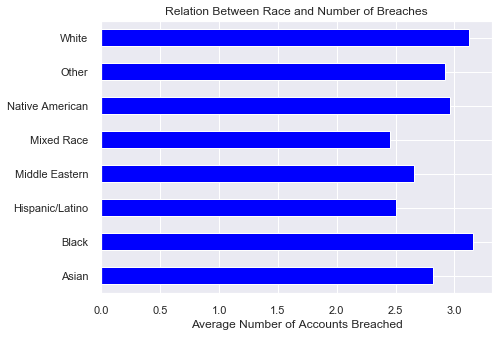

In [58]:
#%% Race and Ethnicity Graph
fig = plt.figure()
ax = (pd.DataFrame (fin_dat.groupby(['id', 'race_eth'])['pwn'].sum().groupby(['race_eth']).mean().round(2))).plot(kind='barh',
                                                                                                                      legend=False,
                                                                                                                      figsize=[7, 5],
                                                                                                                      color='blue',
                                                                                                                      title='Relation Between Race and Number of Breaches')
ax.set_xlabel('Average Number of Accounts Breached')
ax.set_ylabel('')
plt.savefig('Race.png',bbox_inches = 'tight')
plt.show()

### We next check how frequency of email being part of breaches varies by how educated a person is.

In [59]:
#%%  changing numbers to Education labels
fin_dat['educat'] = fin_dat['educ'].replace({1: 'No HS',
                                             2: 'HS Grad.',
                                             3: 'Some College',
                                             4: '2-year College Degree',
                                             5: '4-year College Degree',
                                             6: 'Postgrad Degree'})

# Let's check how many of each we got
x1=(fin_dat['educat'].value_counts()/fin_dat['educat'].value_counts().sum()).round(2)
print(x1)
# Average by education
fin_dat.groupby(['id', 'educat'])['pwn'].sum().groupby(['educat']).mean().round(2)

HS Grad.                 0.32
Some College             0.20
4-year College Degree    0.19
Postgrad Degree          0.11
2-year College Degree    0.11
No HS                    0.06
Name: educat, dtype: float64


educat
2-year College Degree    3.07
4-year College Degree    3.22
HS Grad.                 2.89
No HS                    2.35
Postgrad Degree          3.20
Some College             3.04
Name: pwn, dtype: float64

#### The ordinary number of breaches people with no HS are parcel of is reasonable 2.35. Compare this to postgrads, with a mean of 3.20 or over 36% more noticeable!. The numbers are once more persuading. The relationship between the typical number of breaches a panelists' mail is the parcel of and their instruction is generally monotonic.

### Education Graph

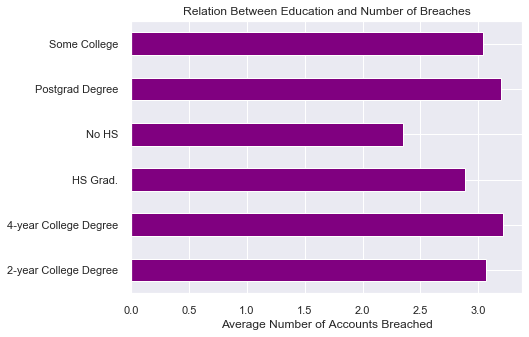

In [60]:
#%% Education Graph
ax = pd.DataFrame(fin_dat.groupby(['id', 'educat'])['pwn'].sum().groupby(['educat']).mean().round(2)).plot(kind='barh',
                                                                                                               legend=False,
                                                                                                               figsize=[7, 5],
                                                                                                               color='Purple',
                                                                                                                title='Relation Between Education and Number of Breaches')
ax.set_xlabel('Average Number of Accounts Breached')
ax.set_ylabel('')
plt.savefig('Education.png', bbox_inches = 'tight')
plt.show()

### Lastly, we check the relationship with age.

In [61]:
#%% Recode By Age

fin_dat['agecat'] = pd.cut(2020 - fin_dat['birthyr'], [18, 25, 35, 50, 65, 100])
print((fin_dat['agecat'].value_counts()/fin_dat['agecat'].value_counts().sum()).round(2))
fin_dat.groupby(['id', 'agecat'])['pwn'].sum().groupby(['agecat']).mean().round(2)


(50, 65]     0.28
(35, 50]     0.26
(65, 100]    0.21
(25, 35]     0.18
(18, 25]     0.07
Name: agecat, dtype: float64


agecat
(18, 25]     1.69
(25, 35]     3.02
(35, 50]     3.28
(50, 65]     3.32
(65, 100]    2.97
Name: pwn, dtype: float64

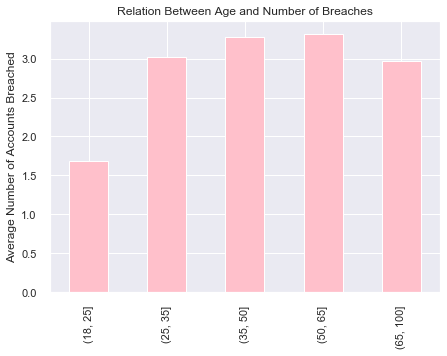

In [62]:
#%% Age Graph
x2 = pd.DataFrame(fin_dat.groupby(['id', 'agecat'])['pwn'].sum().groupby(['agecat']).mean().round(2)).plot(kind='bar',
                                                                                             legend=False,
                                                                                             figsize=[7, 5],
                                                                                             color='pink',
                                                                                             title='Relation Between Age and Number of Breaches')
x2.set_ylabel('Average Number of Accounts Breached')
x2.set_xlabel('')
plt.savefig('Age.png', bbox_inches ="tight")
plt.show()

#### We observe with age a surprisingly angular design. Young people (in part because they may have an account with some of the compromised websites) have their emails as a share of the least breaches (Mean = 1.69). For individuals between 25 and 35 years of age there is a soak hop to 3.02 and for individuals between 35 and 50 (Mean = 3.28) there is another hop. Individuals over 65 have emails that are part of somewhat fewer breaches on average (Mean = 2.97).

### Now let's check share of different breaches in the data.

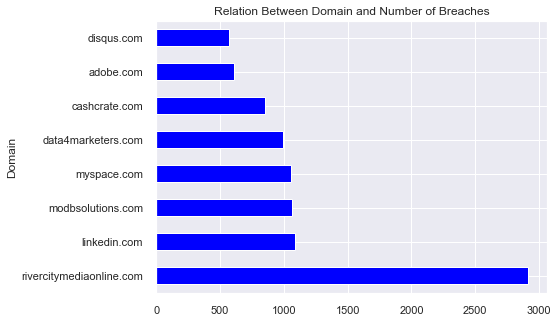

In [63]:
df= fin_dat.groupby(['Domain']).size().sort_values(ascending = False)
df1= df.head(8)
x2 = pd.DataFrame(df1).plot(kind='barh', 
                            legend=False,
                                      figsize=[7, 5],
                                      color='blue',
                                      title='Relation Between Domain and Number of Breaches')
x2.set_ylabel('Domain')
x2.set_xlabel('')
plt.savefig('domain.png', bbox_inches ="tight")
plt.show()



In [64]:
x =fin_dat.groupby(['Domain']).size()[fin_dat.groupby(['Domain']).size() > 100].nunique()
print(x)

21


In [65]:
fin_dat.groupby(['Domain']).size()[fin_dat.groupby(['Domain']).size() > 100].sum()

11783

#### Lastly, we investigate the kind of breaches. HIBP uses the code 'SpamList' for cases where personal data is being used for spamming people. Here's HIBP: "Occasionally, large volumes of personal data are found being utilised for the purposes of sending targeted spam. This often includes many of the same attributes frequently found in data breaches such as names, addresses, phones numbers and dates of birth. The lists are often aggregated from multiple sources, frequently by eliciting personal information from people with the promise of a monetary reward . Whilst the data may not have been sourced from a breached system, the personal nature of the information and the fact that it's redistributed in this fashion unbeknownst to the owners warrants inclusion here."


In [66]:

fin_dat['IsSpamList'].sum(skipna = True)


5649

#### Is there any data from 'fabricated breaches'? More on what HIBP means by fabricated breaches: "Some breaches may be flagged as "fabricated". In these cases, it is highly unlikely that the breach contains legitimate data sourced from the alleged site but it may still be sold or traded under the auspices of legitimacy. Often these incidents are comprised of data aggregated from other locations (or may be entirely fabricated), yet still contain actual email addresses of unbeknownst to the account holder. Fabricated breaches are still included in the system because regardless of their legitimacy, they still contain personal information about individuals who want to understand their exposure on the web."


In [67]:

fin_dat['IsFabricated'].sum(skipna = True)


0

#### What proportion comes from "unverified" breaches? Here's HIBP on what it means by unverified breaches: "Some breaches may be flagged as "unverified". In these cases, whilst there is legitimate data within the alleged breach, it may not have been possible to establish legitimacy beyond reasonable doubt. Unverified breaches are still included in the system because regardless of their legitimacy, they still contain personal information about individuals who want to understand their exposure on the web." Suggested reading: https://www.troyhunt.com/introducing-unverified-breaches-to-have-i-been-pwned/


In [68]:

fin_dat['IsVerified'].sum(skipna = True)


14979

#### It appears that an overwhelming majority of the data comes from verified breaches.It is useful to see if associations with socio-economic indicators hold up when we subset on verified, non-spam breaches.


In [69]:

fin_small_dat = fin_dat[pd.isna(fin_dat['IsSpamList']) | (fin_dat['IsSpamList'] == False)]
fin_small_dat = fin_small_dat[pd.isna(fin_small_dat['IsVerified']) | fin_small_dat['IsVerified'] == True]

numofrows = fin_small_dat.shape[0]
print(numofrows)
fin_small_dat.head(5)



10188


,id,gender,birthyr,race,educ,faminc,inputstate,pid3,pid7,votereg,...,IsSensitive,IsActive,IsRetired,IsSpamList,LogoType,agecat,educat,pwn,sex,race_eth
1,371823339,1,1993,1,2,4,39,3,5,1,...,False,True,False,False,svg,"(25, 35]",HS Grad.,True,male,White
2,398212310,1,2000,1,2,97,51,5,8,3,...,NaN,NaN,NaN,NaN,NaN,"(18, 25]",HS Grad.,False,male,White
3,392933925,1,2000,1,1,1,34,2,7,1,...,False,True,False,False,svg,"(18, 25]",No HS,True,male,White
4,392933925,1,2000,1,1,1,34,2,7,1,...,False,True,False,False,png,"(18, 25]",No HS,True,male,White
5,372445135,1,1994,1,2,2,55,3,3,2,...,False,True,False,False,png,"(25, 35]",HS Grad.,True,male,White


In [70]:

print(fin_small_dat.groupby(['id', 'educ'])['pwn'].sum().groupby(['educ']).mean().round(2))


educ
1    1.53
2    1.91
3    2.22
4    2.10
5    2.37
6    2.30
Name: pwn, dtype: float64


#### The pattern holds up. Again, the number of breached accounts of people with college degree or more is higher than people who only got as far as high school.How about men versus women.


In [71]:
fin_small_dat.groupby(['id', 'sex'])['pwn'].sum().groupby(['sex']).mean().round(2)

sex
female    2.15
male      2.05
Name: pwn, dtype: float64

#### The pattern is more attenuated than above with averages about the same. How about when we split by race and ethnicity.


In [72]:

fin_small_dat.groupby(['id', 'race_eth'])['pwn'].sum().groupby(['race_eth']).mean().round(2)



race_eth
Asian              2.16
Black              2.03
Hispanic/Latino    1.73
Middle Eastern     2.05
Mixed Race         1.70
Native American    1.85
Other              2.69
White              2.21
Name: pwn, dtype: float64

#### Again, things look a bit different than above. Asians join Whites at the top of the pile. (We have too few Others to say something very confidently.) African Americans and Hispanics' accounts are less frequently breached.


In [73]:
fin_small_dat.groupby(['id', 'agecat'])['pwn'].sum().groupby(['agecat']).mean().round(2)


agecat
(18, 25]     1.39
(25, 35]     2.37
(35, 50]     2.37
(50, 65]     2.21
(65, 100]    1.79
Name: pwn, dtype: float64

#### The general pattern for age remains roughly similar with the middle aged more likely to have their accounts breached compared to the less than 25 and the over 65.


In [74]:
fin_res = pd.DataFrame(columns=['Sociodemographics','Mean','SE'])
print (fin_res)


Empty DataFrame
Columns: [Sociodemographics, Mean, SE]
Index: []


In [75]:
len(fin_small_dat)

10188

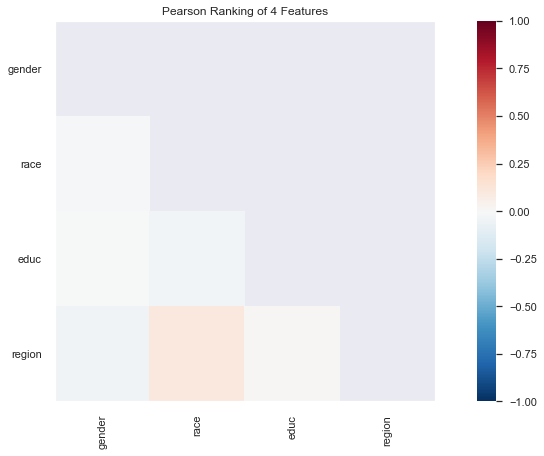

In [76]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = fin_dat[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [77]:
# get the categorical data
cat_features = ['gender', 'race', 'educ']
data_cat = fin_dat[cat_features]
data_cat = data_cat.replace({'race': {1: 'White', 2: 'Black', 3: 'Hispanic',4:'Asian',5 : 'Native American',6: 'Middle Eastern',7: 'Mixed Race', 8: 'Other'}})
                
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,gender,educ,race_Asian,race_Black,race_Hispanic,race_Middle Eastern,race_Mixed Race,race_Native American,race_Other,race_White
0,1,2,0,0,0,0,0,0,0,1
1,1,2,0,0,0,0,0,0,0,1
2,1,2,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,1


['Breached', 'Not Breached']
[[-0.53627581 -0.10360909 -0.28219991 -0.21039338]
 [-0.53627581 -0.10360909 -0.28219991 -0.21039338]
 [-0.53627581 -0.10360909 -0.28219991  0.12293995]
 ...
 [ 0.46372419  0.75353377  0.51780009  0.12293995]
 [ 0.46372419  0.75353377  0.51780009  0.12293995]
 [ 0.46372419  0.61067663 -0.28219991 -0.21039338]]
[1 1 1 ... 2 2 2]


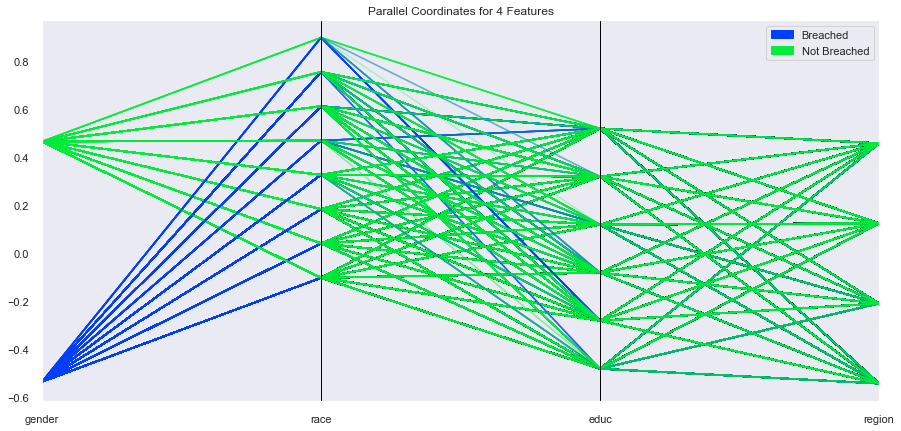

In [78]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Breached', 'Not Breached']
num_features = ['gender', 'race', 'educ', 'region']

# copy data to a new dataframe
data_norm = fin_dat.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (fin_dat[feature] - fin_dat[feature].mean(skipna=True)) / (fin_dat[feature].max(skipna=True) - fin_dat[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = fin_dat.gender.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data